<a href="https://colab.research.google.com/github/linah1234/Code---Test/blob/main/PEM_Water_Electrolyzer_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PEM Electrolyzer Electrochemical Model for One Module**

In [ ]:
import numpy as np

# Constants
F = 96485  # Faraday constant in C/mol
R = 8.314  # Universal gas constant in J/mol·K
M_H2 = 2.016e-3  # Molar mass of H2 in kg/mol
M_H2O = 18.01528e-3  # Molar mass of H2O in kg/mol
rho_H2O = 997  # Density of water in kg/m³

# Given nominal PEM electrolyzer parameters
N_cells = 1600  # Number of series-connected cells
T_degC = 80 # Temperature in deg C
T = T_degC + 273  # Operating temperature in Kelvin (328 K)
I_cell = 300  # Operating current in A
A_cell = 120  # Active area of a single cell in cm²
# Current density calculation based on the updated active area
j = I_cell / (A_cell)  # Current density in A/cm²
eta_F = 0.95  # Faradaic efficiency (95%)
humidity_membrane = 21
thickness_membrane = 51 * 10**(-6) # m
conductivity_membrane = (0.005139*humidity_membrane-0.00326)*np.exp(1.268*(1/303-1/T))

# Other given conditions (example numbers for now, theoretical equations can be used)
P_H2 = 1  # Hydrogen pressure in bar
P_O2 = 1  # Oxygen pressure in bar
alpha_H2O = 1  # Activity Coefficient of Water

# Reversible voltage
V_rev_0 = 1.229  # Using the theoretical value from Gibbs Free Energy calculation (STP)
V_rev = V_rev_0 + (R * T/ (2* F) ) * np.log((P_H2*P_O2**0.5)/ alpha_H2O)

# Activation overpotential (example values)
alpha = 0.5  # Charge transfer coefficient
i0 = 0.001  # Exchange current density in A/cm²
V_act = (R * T / (alpha * F)) * np.arcsinh(j / (2 * i0))  #If we deviate +50 mV from the Vrev, then the cathodic contribution is negligble (Butler-Volmer)

# Ohmic losses (example values)
R_mem = thickness_membrane/conductivity_membrane # Resistance in ohms
R_ohm = R_mem  # Ohmic resistance in ohms
V_ohm = I_cell * R_ohm

# Concentration overpotential (example values) - need to change values if considering V_conc
C_O2 = 1  # Oxygen concentration
C_H2 = 1  # Hydrogen concentration
C_O2_0 = 1  # Reference oxygen concentration
C_H2_0 = 1  # Reference hydrogen concentration
V_conc = (R * T / (4 * F)) * np.log(C_O2 / C_O2_0) + (R * T / (2 * F)) * np.log(C_H2 / C_H2_0)

# Total cell voltage (including losses)
# V_cell = V_rev + V_act + V_ohm + V_conc
V_cell = V_rev + V_act + V_ohm #(not considering concentration losses due to low current density)

# Total stack voltage (N_cells in series)
V_stack = N_cells * V_cell

# Theoretical hydrogen production rate per cell in mol/s
n_H2_per_cell_theoretical = I_cell / (2 * F)

# Actual hydrogen production rate per cell with Faradaic efficiency
n_H2_per_cell_actual = eta_F * n_H2_per_cell_theoretical

# Total hydrogen production rate for the entire stack
n_H2_stack_actual = n_H2_per_cell_actual * N_cells

# Hydrogen mass production rate in kg/s
m_H2_stack_actual = n_H2_stack_actual * M_H2

m_H2_stack_actual_hour = m_H2_stack_actual * 3600

# Water consumption calculation (kg/s)
m_H2O_consumption = n_H2_stack_actual * M_H2O * 3600 # kg/h
volume_H2O_consumption = m_H2O_consumption /rho_H2O * 1000 # L/h

P_input = I_cell*V_stack # Stack rated power in W
P_consumption = (P_input*3600)/(m_H2_stack_actual_hour*3600)

# Constants
M_H2 = 2.016e-3  # Molar mass of hydrogen in kg/mol
V_molar_STP = 22.414/1000  # Molar volume at standard temperature and pressure in Nm³/mol

# Function to convert molar flow rate (mol/s) to Nm³/h
def convert_mass_flow_to_Nm3_per_hr(n_H2):
    volumetric_flow_rate_Nm3_h = n_H2 * V_molar_STP * 3600
    return volumetric_flow_rate_Nm3_h

# Convert to Nm³/h
flow_rate_Nm3_h = convert_mass_flow_to_Nm3_per_hr(n_H2_stack_actual)

print(f"Operating Current: {I_cell} A")
print(f"Current Density: {j} A/cm²")
print(f"Cell Voltage: {V_cell:.3f} V")
print(f"Power Input: {P_input / 1000:.2f} kW")
print(f"Power Consumption: {P_consumption/1000:.2f} kWh/kg")
print(f"Stack Voltage (for {N_cells} cells): {V_stack:.2f} V")
print(f"Hydrogen Production Rate (per stack): {n_H2_stack_actual:.6f} mol/s")
print(f"Mass Flow Rate of Hydrogen (per stack): {m_H2_stack_actual:.6f} kg/s")
print(f"Mass Flow Rate of Hydrogen (per stack): {m_H2_stack_actual_hour:.6f} kg/h")
print(f"Hydrogen flow rate: {flow_rate_Nm3_h:.3f} Nm³/h")
print(f"Water Consumption: {m_H2O_consumption:.3f} kg/h")
print(f"Water Consumption: {volume_H2O_consumption:.3f} L/h")
print("")
print(f"Activation Overpotential: {V_act:.2f} V")
print(f"Ohmic Losses: {V_ohm:.2f} V")
print(f"Concentration Losses: {V_conc:.2f} V")




Operating Current: 300 A
Current Density: 2.5 A/cm²
Cell Voltage: 1.851 V
Power Input: 888.52 kW
Power Consumption: 51.81 kWh/kg
Stack Voltage (for 1600 cells): 2961.73 V
Hydrogen Production Rate (per stack): 2.363062 mol/s
Mass Flow Rate of Hydrogen (per stack): 0.004764 kg/s
Mass Flow Rate of Hydrogen (per stack): 17.150156 kg/h
Hydrogen flow rate: 190.676 Nm³/h
Water Consumption: 153.256 kg/h
Water Consumption: 153.718 L/h

Activation Overpotential: 0.48 V
Ohmic Losses: 0.15 V
Concentration Losses: 0.00 V


## **Polarization Curves**

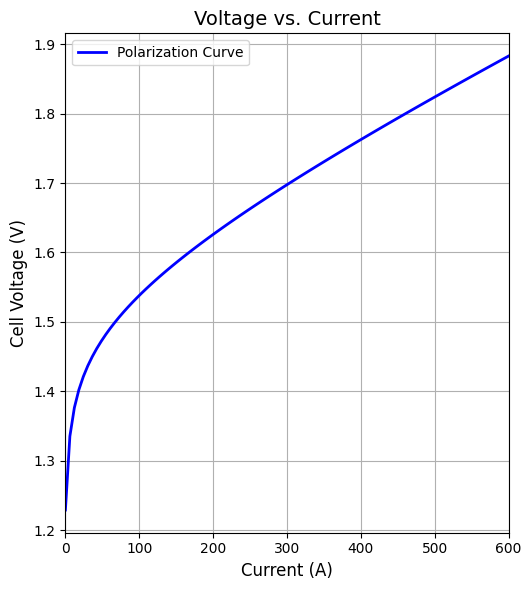

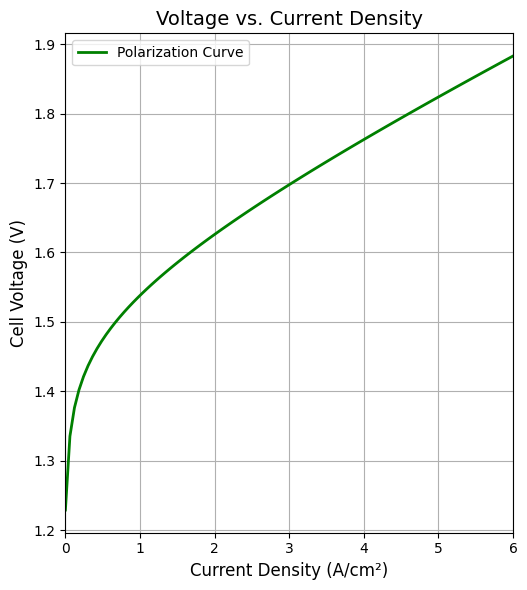

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# Constants
F = 96485  # Faraday constant in C/mol
R = 8.314  # Universal gas constant in J/mol·K
T = 328  # Temperature in Kelvin (328 K)
alpha = 0.5  # Charge transfer coefficient
A_cell = 100  # Active area of a single cell in cm² (100 cm²)
R_ohm = 0.2  # Ohmic resistance in ohms
i0 = 0.01  # Exchange current density in A/cm²
humidity_membrane = 21
thickness_membrane = 51 * 10**(-6) # m
conductivity_membrane = (0.005139*humidity_membrane-0.00326)*np.exp(1.268*(1/303-1/T))

# Function to calculate the voltage for a given current
def calculate_voltage(I_cell):
    # Reversible voltage
    V_rev = 1.229

    # Activation overpotential
    j = I_cell / (A_cell)  # Current density in A/cm²
    V_act = (R * T / (alpha * F)) * np.arcsinh(j / (2 * i0))

    # Ohmic overpotential
    R_mem = thickness_membrane/conductivity_membrane # Resistance in ohms
    R_ohm = R_mem  # Ohmic resistance in ohms
    V_ohm = I_cell * R_ohm

    # Total cell voltage
    V_cell = V_rev + V_act + V_ohm
    return V_cell

# Set up the range of currents (0 to 600 A)
currents = np.linspace(0, 600, 100)  # 100 points between 0 and 600 A
voltages = np.array([calculate_voltage(I) for I in currents])

# Calculate current densities (current / area)
current_densities = currents / A_cell  # A/cm²

# Plotting in scientific style
plt.figure(figsize=(10, 6))

# Plot Voltage vs. Current
plt.subplot(1, 2, 1)
plt.plot(currents, voltages, label="Polarization Curve", color='blue', linewidth=2)
plt.xlabel("Current (A)", fontsize=12)
plt.ylabel("Cell Voltage (V)", fontsize=12)
plt.title("Voltage vs. Current", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, np.max(currents))  # Set x-axis to start from 0 for Current Density
# plt.ylim(0, np.max(voltages) + 0.1)  # Set y-axis to start from 0 for Voltage

# Set the layout for journal format
plt.tight_layout()

# Save the figure in high resolution suitable for scientific journals
plt.savefig("polarization_curve.png", dpi=300)

# Display the plot
plt.show()

# Plot Voltage vs. Current Density
# Plotting in scientific style
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.plot(current_densities, voltages, label="Polarization Curve", color='green', linewidth=2)
plt.xlabel("Current Density (A/cm²)", fontsize=12)
plt.ylabel("Cell Voltage (V)", fontsize=12)
plt.title("Voltage vs. Current Density", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, np.max(current_densities))  # Set x-axis to start from 0 for Current Density
# plt.ylim(0, np.max(voltages) + 0.1)  # Set y-axis to start from 0 for Voltage

# Set the layout for journal format
plt.tight_layout()

# Save the figure in high resolution suitable for scientific journals
plt.savefig("polarization_curve_current_density", dpi=300)

# Display the plot
plt.show()



## **Temperature Dependence**

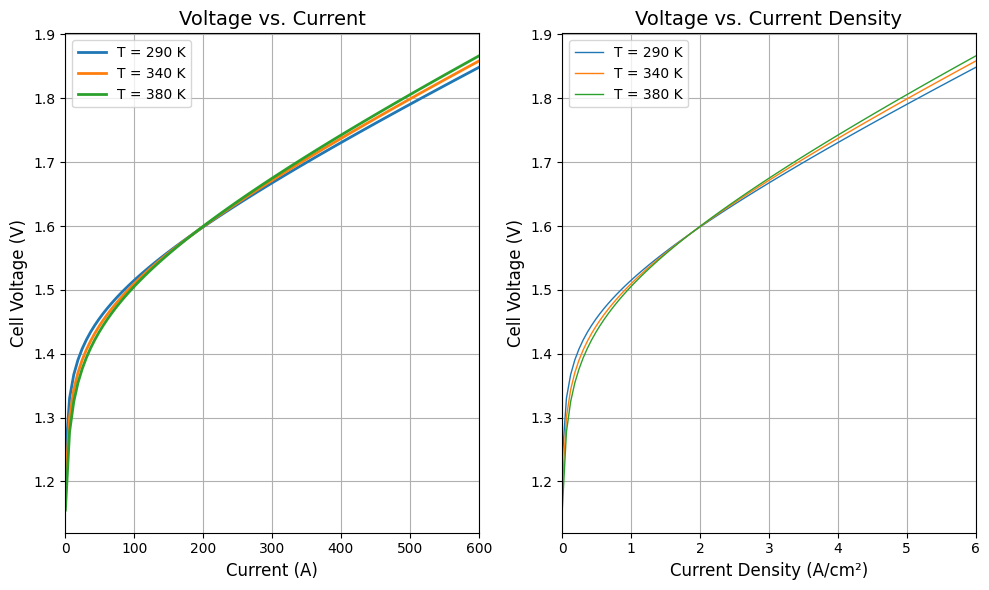

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
F = 96485  # Faraday constant in C/mol
R = 8.314  # Universal gas constant in J/mol·K
alpha = 0.5  # Charge transfer coefficient
A_cell = 100  # Active area of a single cell in cm² (100 cm²)
R_ohm = 0.2  # Ohmic resistance in ohms
i0 = 0.01  # Exchange current density in A/cm²
humidity_membrane = 21
thickness_membrane = 51 * 10**(-6) # m

# Function to calculate the voltage for a given current and temperature
def calculate_voltage(I_cell, T):
    # Reversible voltage with temperature dependency
    V_rev = 1.229 - 0.9e-3 * (T - 298)

    # Activation overpotential
    j = I_cell / (A_cell)  # Current density in A/cm²
    V_act = (R * T / (alpha * F)) * np.arcsinh(j / (2 * i0))

    # Ohmic overpotential
    conductivity_membrane = (0.005139*humidity_membrane-0.00326)*np.exp(1.268*(1/303-1/T))
    R_mem = thickness_membrane/conductivity_membrane # Resistance in ohms
    R_ohm = R_mem  # Ohmic resistance in ohms
    V_ohm = I_cell * R_ohm

    # Total cell voltage
    V_cell = V_rev + V_act + V_ohm
    return V_cell

# Define the range of temperatures (330 K, 340 K, 350 K)
temperatures = [290, 340, 380]

# Set up the range of currents (0 to 600 A)
currents = np.linspace(0, 600, 100)  # 100 points between 0 and 600 A

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the polarization curve for each temperature
for T in temperatures:
    voltages = np.array([calculate_voltage(I, T) for I in currents])
    current_densities = currents / A_cell  # Current density in A/cm²

    # Plot Voltage vs. Current
    plt.subplot(1, 2, 1)
    plt.plot(currents, voltages, label=f"T = {T} K", linewidth=2)

    # Plot Voltage vs. Current Density
    plt.subplot(1, 2, 2)
    plt.plot(current_densities, voltages, label=f"T = {T} K", linewidth=1)

# Customize the Voltage vs. Current plot
plt.subplot(1, 2, 1)
plt.xlabel("Current (A)", fontsize=12)
plt.ylabel("Cell Voltage (V)", fontsize=12)
plt.title("Voltage vs. Current", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 600)  # Set x-axis to start from 0 for Current
# plt.ylim(0, np.max(voltages) + 0.1)  # Set y-axis to start from 0 for Voltage

# Customize the Voltage vs. Current Density plot
plt.subplot(1, 2, 2)
plt.xlabel("Current Density (A/cm²)", fontsize=12)
plt.ylabel("Cell Voltage (V)", fontsize=12)
plt.title("Voltage vs. Current Density", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, np.max(current_densities))  # Set x-axis to start from 0 for Current Density
# plt.ylim(0, np.max(voltages) + 0.1)  # Set y-axis to start from 0 for Voltage

# Set the layout for journal format
plt.tight_layout()

# Save the figure in high resolution suitable for scientific journals
plt.savefig("polarization_curve_variable_temperature.png", dpi=300)

# Display the plot
plt.show()


## **Hydrogen Production Rate vs Current**

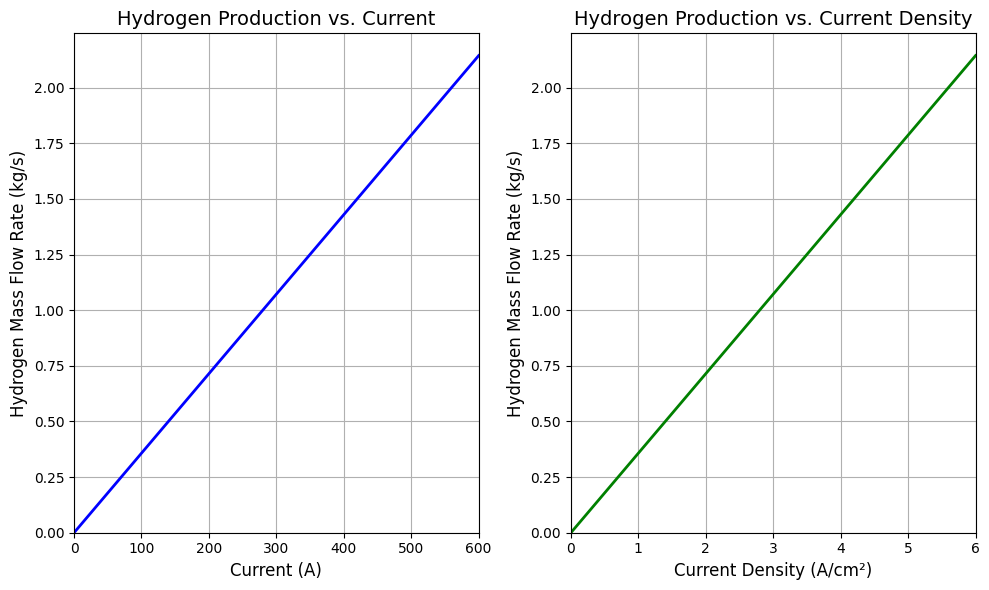

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
F = 96485  # Faraday constant in C/mol
M_H2 = 2.016e-3  # Molar mass of H2 in kg/mol
A_cell = 100  # Active area of a single cell in cm² (100 cm²)
eta_F = 0.95  # Faradaic efficiency (95%)
N_cells = 100 # Number of Cells in series

# Function to calculate hydrogen production rate (mass flow rate) based on current
def calculate_hydrogen_mass_flow(I_cell, eta_F=0.95):
    # Molar flow rate of hydrogen (mol/s)
    n_H2 = eta_F * I_cell / (2 * F)
    # Mass flow rate of hydrogen (kg/s)
    m_H2 = n_H2 * M_H2
    m_H2 = m_H2 * 3600 # convert to kg/hr
    m_H2 = m_H2 * N_cells  # per 100 cells
    return m_H2

# Set up the range of currents (0 to 600 A)
currents = np.linspace(0, 600, 100)  # 100 points between 0 and 600 A

# Calculate the mass flow rate of hydrogen for each current
mass_flow_rates = np.array([calculate_hydrogen_mass_flow(I) for I in currents])

# Calculate current densities (current / area)
current_densities = currents / A_cell  # A/cm²

# Plotting in scientific style
plt.figure(figsize=(10, 6))

# Plot Hydrogen Mass Flow Rate vs. Current
plt.subplot(1, 2, 1)
plt.plot(currents, mass_flow_rates, label="H2 Mass Flow Rate", color='blue', linewidth=2)
plt.xlabel("Current (A)", fontsize=12)
plt.ylabel("Hydrogen Mass Flow Rate (kg/s)", fontsize=12)
plt.title("Hydrogen Production vs. Current", fontsize=14)
plt.grid(True)
plt.xlim(0, np.max(currents))  # Set x-axis to start from 0 for Current
plt.ylim(0, np.max(mass_flow_rates) + 0.1)  # Set y-axis to start from 0

# Plot Hydrogen Mass Flow Rate vs. Current Density
plt.subplot(1, 2, 2)
plt.plot(current_densities, mass_flow_rates, label="H2 Mass Flow Rate", color='green', linewidth=2)
plt.xlabel("Current Density (A/cm²)", fontsize=12)
plt.ylabel("Hydrogen Mass Flow Rate (kg/s)", fontsize=12)
plt.title("Hydrogen Production vs. Current Density", fontsize=14)
plt.grid(True)
plt.xlim(0, np.max(current_densities))  # Set x-axis to start from 0 for Current Density
plt.ylim(0, np.max(mass_flow_rates) + 0.1)  # Set y-axis to start from 0

# Set the layout for journal format
plt.tight_layout()

# Save the figure in high resolution suitable for scientific journals
plt.savefig("hydrogen_production_vs_current_and_current_density.png", dpi=300)

# Display the plot
plt.show()


## **Power Consumption as a function of Current**

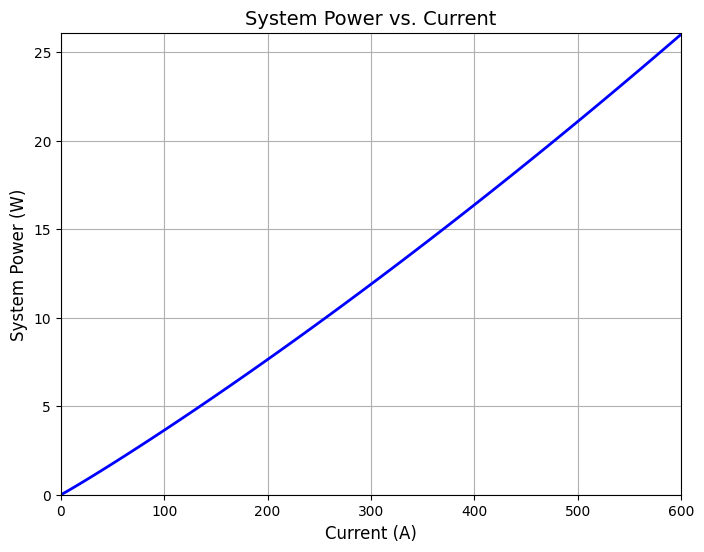

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
F = 96485  # Faraday constant in C/mol
R = 8.314  # Universal gas constant in J/mol·K
alpha = 0.5  # Charge transfer coefficient
A_cell = 100  # Active area of a single cell in cm² (100 cm²)
humidity_membrane = 21
i0 = 0.01  # Exchange current density in A/cm²
N_cells = 20  # Number of series-connected cells
T = 328  # Temperature in Kelvin

# Function to calculate the voltage for a given current
def calculate_voltage(I_cell, T):
    # Reversible voltage
    V_rev = 1.229 - 0.9e-3 * (T - 298)

    # Activation overpotential
    V_act = (R * T / (alpha * F)) * np.arcsinh(I_cell / (2 * i0))

    # Ohmic overpotential
    conductivity_membrane = (0.005139*humidity_membrane-0.00326)*np.exp(1.268*(1/303-1/T))
    R_mem = thickness_membrane/conductivity_membrane # Resistance in ohms
    R_ohm = R_mem  # Ohmic resistance in ohms
    V_ohm = I_cell * R_ohm

    # Concentration overpotential (simplified as a constant for now)
    V_conc = 0.05  # Assuming a small constant concentration overpotential

    # Total cell voltage
    V_cell = V_rev + V_act + V_ohm + V_conc
    return V_cell

# Function to calculate system power
def calculate_system_power(I_cell, T, N_cells):
    V_cell = calculate_voltage(I_cell, T)  # Voltage per cell
    V_stack = N_cells * V_cell  # System voltage (N cells in series)
    P_system = V_stack * I_cell  # System power in watts
    P_system = P_system/1000 #convert to kW
    return P_system

# Set up the range of currents (0 to 600 A)
currents = np.linspace(0, 600, 100)  # 100 points between 0 and 600 A

# Calculate the System power for each current
system_powers = np.array([calculate_system_power(I, T, N_cells) for I in currents])

# Plotting System Power vs. Current
plt.figure(figsize=(8, 6))
plt.plot(currents, system_powers, label="System Power", color='blue', linewidth=2)
plt.xlabel("Current (A)", fontsize=12)
plt.ylabel("System Power (W)", fontsize=12)
plt.title("System Power vs. Current", fontsize=14)
plt.grid(True)
plt.xlim(0, np.max(currents))  # Set x-axis to start from 0 for Current
plt.ylim(0, np.max(system_powers) + 0.1)  # Set y-axis to start from 0

# Save the figure in high resolution suitable for scientific journals
plt.savefig("system_power_vs_current.png", dpi=300)

# Display the plot
plt.show()


## **Function used to find Hydrogen Production Rate, Power Consumption as a function of Current**

In [ ]:
import numpy as np

# Constants
F = 96485  # Faraday constant in C/mol
R = 8.314  # Universal gas constant in J/mol·K
M_H2 = 2.016e-3  # Molar mass of hydrogen in kg/mol
V_molar_STP = 22.414 / 1000  # Molar volume at standard temperature and pressure in Nm³/mol

# Function to calculate hydrogen production rate and power consumption
def electrolyzer_model(I_cell, N_cells=100, T_degC=80, A_cell=100, eta_F=0.95, humidity_membrane=21, thickness_membrane=51e-6, i0=0.001):
    # Convert temperature to Kelvin
    T = T_degC + 273  # Temperature in Kelvin

    # Current density calculation (A/cm²)
    j = I_cell / A_cell  # Current density in A/cm²

    # Conductivity of membrane (S/m)
    conductivity_membrane = (0.005139 * humidity_membrane - 0.00326) * np.exp(1.268 * (1 / 303 - 1 / T))

    # Reversible voltage calculation
    V_rev_0 = 1.229  # Theoretical reversible voltage at STP (V)
    V_rev = V_rev_0 + (R * T / (2 * F)) * np.log(1)  # Assuming P_H2 = P_O2 = 1 bar

    # Activation overpotential calculation
    alpha = 0.5  # Charge transfer coefficient
    V_act = (R * T / (alpha * F)) * np.arcsinh(j / (2 * i0))

    # Ohmic losses (Ohmic overpotential)
    R_mem = thickness_membrane / conductivity_membrane  # Membrane resistance (ohms)
    V_ohm = I_cell * R_mem

    # Concentration overpotential (assumed negligible)
    V_conc = 0  # We neglect concentration losses for low current density

    # Total cell voltage (including losses)
    V_cell = V_rev + V_act + V_ohm + V_conc

    # Total stack voltage (N_cells in series)
    V_stack = N_cells * V_cell

    # Theoretical hydrogen production rate per cell in mol/s
    n_H2_per_cell_theoretical = I_cell / (2 * F)

    # Actual hydrogen production rate per cell with Faradaic efficiency
    n_H2_per_cell_actual = eta_F * n_H2_per_cell_theoretical

    # Total hydrogen production rate for the entire stack
    n_H2_stack_actual = n_H2_per_cell_actual * N_cells

    # Hydrogen mass production rate in kg/s
    m_H2_stack_actual = n_H2_stack_actual * M_H2
    m_H2_stack_actual = m_H2_stack_actual * 3600

    # Convert hydrogen production rate to Nm³/h
    def convert_mass_flow_to_Nm3_per_hr(n_H2):
        volumetric_flow_rate_Nm3_h = n_H2 * V_molar_STP * 3600
        return volumetric_flow_rate_Nm3_h

    # Volumetric hydrogen production rate in Nm³/h
    flow_rate_Nm3_h = convert_mass_flow_to_Nm3_per_hr(n_H2_stack_actual)

    # Power consumption (Stack Power in W)
    P_input = I_cell * V_stack  # Stack power in watts

    P_input = P_input / 1000  # Stack power in kW

    # Return results
    return {
        'Hydrogen_mass_flow_rate_kg_h': m_H2_stack_actual,
        'Hydrogen_production_Nm3_per_hr': flow_rate_Nm3_h,
        'Stack_power_kW': P_input
    }

# Example usage
I_cell = 200  # Operating current in A
result = electrolyzer_model(I_cell)

print(f"Hydrogen mass flow rate: {result['Hydrogen_mass_flow_rate_kg_h']:.6f} kg/h")
print(f"Hydrogen production rate: {result['Hydrogen_production_Nm3_per_hr']:.3f} Nm³/h")
print(f"Stack power consumption: {result['Stack_power_kW']:.2f} kW")


Hydrogen mass flow rate: 0.714590 kg/h
Hydrogen production rate: 7.945 Nm³/h
Stack power consumption: 35.78 kW


## **Hydorgen Compression and Storage Models**

In [ ]:
import numpy as np

# Constants
F = 96485  # Faraday constant in C/mol
R = 8.314  # Universal gas constant in J/mol·K
M_H2 = 2.016e-3  # Molar mass of hydrogen in kg/mol
V_molar_STP = 22.414 / 1000  # Molar volume at standard temperature and pressure in Nm³/mol
R_g = 4124  # Specific gas constant for hydrogen in J/kg·K
k = 1.4  # Polytropic coefficient
compressor_efficiency = 0.75  # Efficiency of the compressor
T_in = 300  # Inlet temperature in Kelvin
P_in = 2  # Inlet pressure in bar (Outlet Pressure of Cathode)
P_out = 30  # Outlet pressure in bar (for storage)
V_tank = 50  # Tank volume in m³
T_tank = 298  # Tank temperature in Kelvin
t_sim = 3600*24 #Simulation Time (24 Hours)

# Function for two-stage compression work calculation
def compression_work_stage(mass_flow_rate, P_in, P_out, T_in, efficiency):
    """
    Calculate the compression work for a given stage.
    :param mass_flow_rate: Hydrogen mass flow rate (kg/s)
    :param P_in: Inlet pressure (bar)
    :param P_out: Outlet pressure (bar)
    :param T_in: Inlet temperature (K)
    :param efficiency: Compressor efficiency
    :return: Compression power required for the stage (W)
    """
    W_compressor_stage = R_g * T_in * (k / (k - 1)) * ((P_out / P_in) ** ((k - 1) / k) - 1)
    P_compressor_stage = (mass_flow_rate * W_compressor_stage) / efficiency
    return P_compressor_stage

# Function to calculate hydrogen production, compression, and storage
def electrolyzer_compression_storage_model(I_cell, N_cells=100, T_degC=80, A_cell=100, eta_F=0.95, humidity_membrane=21, thickness_membrane=51e-6, i0=0.001):
    # Convert temperature to Kelvin
    T = T_degC + 273  # Temperature in Kelvin

    # Current density calculation (A/cm²)
    j = I_cell / A_cell  # Current density in A/cm²

    # Conductivity of membrane (S/m)
    conductivity_membrane = (0.005139 * humidity_membrane - 0.00326) * np.exp(1.268 * (1 / 303 - 1 / T))

    # Reversible voltage calculation
    V_rev_0 = 1.229  # Theoretical reversible voltage at STP (V)
    V_rev = V_rev_0 + (R * T / (2 * F)) * np.log(1)  # Assuming P_H2 = P_O2 = 1 bar

    # Activation overpotential calculation
    alpha = 0.5  # Charge transfer coefficient
    V_act = (R * T / (alpha * F)) * np.arcsinh(j / (2 * i0))

    # Ohmic losses (Ohmic overpotential)
    R_mem = thickness_membrane / conductivity_membrane  # Membrane resistance (ohms)
    V_ohm = I_cell * R_mem

    # Concentration overpotential (assumed negligible)
    V_conc = 0  # We neglect concentration losses for low current density

    # Total cell voltage (including losses)
    V_cell = V_rev + V_act + V_ohm + V_conc

    # Total stack voltage (N_cells in series)
    V_stack = N_cells * V_cell

    # Theoretical hydrogen production rate per cell in mol/s
    n_H2_per_cell_theoretical = I_cell / (2 * F)

    # Actual hydrogen production rate per cell with Faradaic efficiency
    n_H2_per_cell_actual = eta_F * n_H2_per_cell_theoretical

    # Total hydrogen production rate for the entire stack
    n_H2_stack_actual = n_H2_per_cell_actual * N_cells

    # Hydrogen mass production rate in kg/s
    m_H2_stack_actual = n_H2_stack_actual * M_H2

    # Water consumption calculation (kg/s)
    m_H2O_consumption = n_H2_stack_actual * 0.018015  # Molar mass of water (kg/mol)

    # Two-stage compression
    P_intermediate = np.sqrt(P_in * P_out)  # Intermediate pressure for equal ratio compression
    P_compressor_stage_1 = compression_work_stage(m_H2_stack_actual, P_in, P_intermediate, T_in, compressor_efficiency)
    P_compressor_stage_2 = compression_work_stage(m_H2_stack_actual, P_intermediate, P_out, T_in, compressor_efficiency)

    # Total compression power
    P_compressor_total = P_compressor_stage_1 + P_compressor_stage_2

    # # Hydrogen compression calculation (work done by the compressor)
    # W_compressor = R_g * T_in * (k / (k - 1)) * ((P_out / P_in) ** ((k - 1) / k) - 1)
    # P_compressor = (m_H2_stack_actual * W_compressor) / compressor_efficiency  # Compressor power in watts

    # Hydrogen storage pressure based on ideal gas law
    n_H2_tank = n_H2_stack_actual*t_sim  # Molar rate entering the tank from the compressor
    P_tank = (n_H2_tank * R * T_tank) / V_tank  # Pressure in the tank (Pa)

    # Convert pressure from Pa to bar for readability
    P_tank_bar = P_tank / 1e5  # Pressure in bar

    # Convert hydrogen production rate to Nm³/h
    def convert_mass_flow_to_Nm3_per_hr(n_H2):
        volumetric_flow_rate_Nm3_h = n_H2 * V_molar_STP * 3600
        return volumetric_flow_rate_Nm3_h

    # Volumetric hydrogen production rate in Nm³/h
    flow_rate_Nm3_h = convert_mass_flow_to_Nm3_per_hr(n_H2_stack_actual)

    # Power consumption (Stack Power in W)
    P_input = I_cell * V_stack  # Stack power in watts
    # Return results
    return {
        'Hydrogen_mass_flow_rate_kg_s': m_H2_stack_actual,
        'Hydrogen_production_Nm3_per_hr': flow_rate_Nm3_h,
        'Stack_power_W': P_input,
        'Compressor_power_W': P_compressor_total,
        'Storage_tank_pressure_bar': P_tank_bar,
        'Water_consumption_kg_s': m_H2O_consumption
    }

# Example usage
I_cell = 135  # Operating current in A
result = electrolyzer_compression_storage_model(I_cell)

print(f"Hydrogen mass flow rate: {result['Hydrogen_mass_flow_rate_kg_s']:.6f} kg/s")
print(f"Hydrogen production rate: {result['Hydrogen_production_Nm3_per_hr']:.3f} Nm³/h")
print(f"Stack power consumption: {result['Stack_power_W']:.2f} W")
print(f"Total compressor power consumption: {result['Compressor_power_W']:.2f} W")
print(f"Storage tank pressure: {result['Storage_tank_pressure_bar']:.2f} Bar")
print(f"Water consumption rate: {result['Water_consumption_kg_s']:.6f} kg/s")

Hydrogen mass flow rate: 0.000134 kg/s
Hydrogen production rate: 5.363 Nm³/h
Stack power consumption: 23398.71 W
Total compressor power consumption: 730.81 W
Storage tank pressure: 2.85 Bar
Water consumption rate: 0.001197 kg/s


In [ ]:
import numpy as np

# Constants
R = 8.314  # Universal gas constant in J/mol·K
M_H2 = 2.016e-3  # Molar mass of hydrogen in kg/mol
R_g = 4124  # Specific gas constant for hydrogen in J/kg·K
k = 1.4  # Polytropic coefficient
compressor_efficiency = 0.75  # Efficiency of the compressor
V_tank = 50  # Tank volume in m³
T_tank = 298  # Tank temperature in Kelvin

# Function for compression work calculation for polytropic process
def compression_work_stage(mass_flow_rate, P_in, P_out, T_in, efficiency):
    """
    Calculate the compression work for a given stage.
    :param mass_flow_rate: Hydrogen mass flow rate (kg/s)
    :param P_in: Inlet pressure (bar)
    :param P_out: Outlet pressure (bar)
    :param T_in: Inlet temperature (K)
    :param efficiency: Compressor efficiency
    :return: Compression power required for the stage (W)
    """
    W_compressor_stage = R_g * T_in * (k / (k - 1)) * ((P_out / P_in) ** ((k - 1) / k) - 1)
    P_compressor_stage = (mass_flow_rate * W_compressor_stage) / efficiency
    return P_compressor_stage

# Function to calculate tank pressure using ideal gas law
def calculate_tank_pressure(M_H2_tank, V_tank, T_tank):
    """
    Calculate the pressure inside the hydrogen storage tank.
    :param M_H2_tank: Mass of hydrogen in the tank (kg)
    :param V_tank: Volume of the tank (m³)
    :param T_tank: Temperature inside the tank (K)
    :return: Pressure inside the tank in bar
    """
    n_H2_tank = M_H2_tank / M_H2  # Moles of hydrogen in the tank
    P_tank = (n_H2_tank * R * T_tank) / V_tank  # Pressure in Pa
    return P_tank / 1e5  # Convert pressure from Pa to bar

# Function for updating mass in the tank based on inflow and outflow
def update_mass(M_H2_tank, m_H2_in, m_H2_out, dt):
    """
    Update the mass of hydrogen in the storage tank.
    :param M_H2_tank: Current mass of hydrogen in the tank (kg)
    :param m_H2_in: Hydrogen inflow rate (kg/s)
    :param m_H2_out: Hydrogen outflow rate (kg/s)
    :param dt: Time step (seconds)
    :return: Updated mass of hydrogen in the tank (kg)
    """
    M_H2_tank_new = M_H2_tank + (m_H2_in - m_H2_out) * dt
    return M_H2_tank_new

# Function to calculate the energy stored in the hydrogen inside the tank
def calculate_energy_stored(M_H2_tank, LHV_H2=120e6):
    """
    Calculate the total energy stored in the hydrogen in the tank.
    :param M_H2_tank: Mass of hydrogen in the tank (kg)
    :param LHV_H2: Lower heating value of hydrogen (J/kg), default is 120 MJ/kg
    :return: Total energy stored in the hydrogen (Joules)
    """
    return M_H2_tank * LHV_H2

# Initialize variables
M_H2_tank = 0  # Initial mass of hydrogen in the tank (kg)
m_H2_in = 0.001  # Hydrogen inflow rate in kg/s
m_H2_out = 0.0005  # Hydrogen outflow rate in kg/s
dt = 3600  # Time step in seconds (1 hour)

# Update the mass of hydrogen in the tank
M_H2_tank = update_mass(M_H2_tank, m_H2_in, m_H2_out, dt)

# Calculate the pressure inside the tank
P_tank = calculate_tank_pressure(M_H2_tank, V_tank, T_tank)
print(f"Tank pressure: {P_tank:.2f} bar")

# Calculate the total energy stored in the tank
E_stored = calculate_energy_stored(M_H2_tank)
print(f"Energy stored: {E_stored / 1e6:.2f} MJ")

# Calculate compressor work for the first compression stage
P_in = 1  # Inlet pressure in bar
P_out = 30  # Outlet pressure in bar
T_in = 300  # Inlet temperature in Kelvin
mass_flow_rate = m_H2_in  # Mass flow rate of hydrogen into the compressor

# Compression work calculation
compressor_power = compression_work_stage(mass_flow_rate, P_in, P_out, T_in, compressor_efficiency)
print(f"Compressor power: {compressor_power:.2f} W")


Tank pressure: 0.44 bar
Energy stored: 216.00 MJ
Compressor power: 9483.83 W


## **Object-Oriented Programming Structure**

In [ ]:
import numpy as np

# Constants
F = 96485  # Faraday constant in C/mol
R = 8.314  # Universal gas constant in J/mol·K
M_H2 = 2.016e-3  # Molar mass of hydrogen in kg/mol
V_molar_STP = 22.414 / 1000  # Molar volume at standard temperature and pressure in Nm³/mol
R_g = 4124  # Specific gas constant for hydrogen in J/kg·K

# PEM Electrolyzer Class
class PEMElectrolyzer:
    def __init__(self, I_cell, N_cells=100, T_degC=80, A_cell=100, eta_F=0.95, humidity_membrane=21, thickness_membrane=51e-6, i0=0.001):
        self.I_cell = I_cell
        self.N_cells = N_cells
        self.T_degC = T_degC
        self.A_cell = A_cell
        self.eta_F = eta_F
        self.humidity_membrane = humidity_membrane
        self.thickness_membrane = thickness_membrane
        self.i0 = i0
        self.T = T_degC + 273  # Convert temperature to Kelvin
        self.j = I_cell / A_cell  # Current density

    def calculate_voltage(self):
        conductivity_membrane = (0.005139 * self.humidity_membrane - 0.00326) * np.exp(1.268 * (1 / 303 - 1 / self.T))
        V_rev_0 = 1.229
        V_rev = V_rev_0 + (R * self.T / (2 * F)) * np.log(1)  # Reversible voltage
        V_act = (R * self.T / (0.5 * F)) * np.arcsinh(self.j / (2 * self.i0))  # Activation overpotential
        V_ohm = self.I_cell * (self.thickness_membrane / conductivity_membrane)  # Ohmic loss
        V_conc = 0  # Concentration loss is negligible for low current density
        return V_rev + V_act + V_ohm + V_conc  # Total cell voltage

    def hydrogen_production(self):
        V_cell = self.calculate_voltage()
        V_stack = self.N_cells * V_cell
        n_H2_per_cell_theoretical = self.I_cell / (2 * F)
        n_H2_per_cell_actual = self.eta_F * n_H2_per_cell_theoretical
        n_H2_stack_actual = n_H2_per_cell_actual * self.N_cells
        m_H2_stack_actual = n_H2_stack_actual * M_H2  # Hydrogen mass flow rate in kg/s
        return m_H2_stack_actual, V_stack

# Compressor Class
class Compressor:
    def __init__(self, T_in=300, P_in=1, P_out=300, compressor_efficiency=0.75):
        self.T_in = T_in
        self.P_in = P_in
        self.P_out = P_out
        self.compressor_efficiency = compressor_efficiency

    def compression_power(self, mass_flow_rate):
        W_compressor = R_g * self.T_in * (1.4 / (1.4 - 1)) * ((self.P_out / self.P_in) ** ((1.4 - 1) / 1.4) - 1)
        return (mass_flow_rate * W_compressor) / self.compressor_efficiency

# Hydrogen Storage Class
class HydrogenStorage:
    def __init__(self, V_tank=50, T_tank=298):
        self.V_tank = V_tank
        self.T_tank = T_tank

    def calculate_tank_pressure(self, molar_flow_rate):
        P_tank = (molar_flow_rate * R * self.T_tank) / self.V_tank  # Pressure in Pa
        return P_tank / 1e5  # Convert to bar

# Simulation Class
class HydrogenSystem:
    def __init__(self, I_cell):
        self.electrolyzer = PEMElectrolyzer(I_cell)
        self.compressor = Compressor()
        self.storage = HydrogenStorage()

    def run_simulation(self):
        # Electrolyzer output
        m_H2_stack_actual, V_stack = self.electrolyzer.hydrogen_production()

        # Compressor power consumption
        compressor_power = self.compressor.compression_power(m_H2_stack_actual)

        # Storage tank pressure
        n_H2_stack_actual = m_H2_stack_actual / M_H2  # Convert mass flow rate to molar flow rate
        storage_pressure = self.storage.calculate_tank_pressure(n_H2_stack_actual)

        # Print results
        print(f"Hydrogen mass flow rate: {m_H2_stack_actual:.6f} kg/s")
        print(f"Stack voltage: {V_stack:.2f} V")
        print(f"Compressor power consumption: {compressor_power:.2f} W")
        print(f"Storage tank pressure: {storage_pressure:.2f} bar")

# Example Usage
I_cell = 135  # Operating current in A
system = HydrogenSystem(I_cell)
system.run_simulation()


Hydrogen mass flow rate: 0.000134 kg/s
Stack voltage: 173.32 V
Compressor power consumption: 3173.30 W
Storage tank pressure: 0.00 bar
